In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from math import factorial
from scipy.special import binom

# Blood Feller

Temos que $N$ pessoas fazem um teste sanguíneo. Que pode ser feito de dois jeitos diferentes:

- Cada pessoa pode ser testada separadamente
- O teste pode ser feito em grupos de $k$ pessoas

No primeiro caso são feitos $N$ testes. No segundo, se o teste é negativo, apenas um já é suficiente para as $k$ pessoas, caso contrário cada uma das $k$ pessoas precisa fazer o teste separado totalizando $k+1$ testes para as $k$ pessoas. Sendo que a probabilidade de o teste dar positivo é $p$ para todas as pessoas e elas são stocasticamente independentes.

## A

Sabendo que a probabilidade de 1 pessoa  testar positivo é de $p$ e que elas são esstocasticamente independentes, dado um teste de $k$ pessoas temos:
$$
P(T=+|k=1)=p\\
P(T=+|k=2)=1-(1-p)^2\\
\vdots \\
P(T=+|k=m)=1-(1-p)^m
$$

Pois basta que apenas 1 pessoa seja positiva para que o teste seja positivo sendo assim o único caso onde isto não ocorre é quando todas as pessoas são negativas.

## B

Temos que o valor esperado de testes no segundo caso é dado por:

$$
\xi = \left\lfloor{\frac{N}{k}}\right\rfloor\\
E(X) =\sum_{i=0}^\xi \left(\begin{array}{c} \xi\\ i\end{array}\right) \left[(i+(\xi-i)(k+1))(1-p)^{ik}(1-(1-p)^k)^{\xi-i}\right]+N-\xi k
$$


In [3]:
N = 10

k=4

p = 0.1

vp = [1-p,p]

m = 10000

num_t=[]
for j in range(m):
    n=0
    for j in range(N//k):
        v = np.random.choice([0,1],k,p=vp)
        if 1 not in v:
            n+=1
        else:
            n+=k+1
    n+=N%k
    num_t.append(n)

In [4]:
np.mean(num_t)

6.7672

(array([4260.,    0.,    0.,    0.,    0., 4562.,    0.,    0.,    0.,
        1178.]),
 array([ 4. ,  4.8,  5.6,  6.4,  7.2,  8. ,  8.8,  9.6, 10.4, 11.2, 12. ]),
 <a list of 10 Patch objects>)

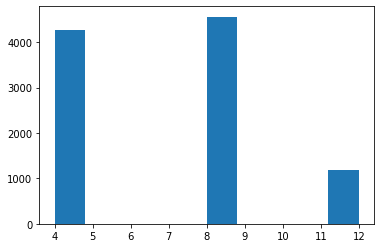

In [5]:
plt.hist(num_t)

In [18]:
def exp(N,k,p):
    xi = N//k
    pin = (1-p)**k
    soma = 0
    for j in range(xi+1):
        b = binom(xi,j)
        n = j+(int(k)+1)*(xi-j)
        soma+=b*(n*pin**j*(1-pin)**(xi-j))
    return soma+N%k

In [8]:
exp(N,int(1/np.sqrt(p)),p)

6.438999999999999

In [22]:
ks = np.linspace(1,300, 300)
exps = [exp(N, int(ki), p) for ki in ks]

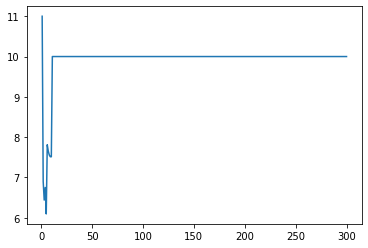

In [24]:
plt.plot(ks, exps)

In [9]:
2*N*np.sqrt(p)

6.324555320336759

In [125]:
def exp2(N,k,p):
    D=N/k
    return D*((k+1)*(1-(1-p)**k)+(1-p)**k)

In [126]:
exp2(N,k,p)

5.939